In [30]:
def conv_filter(model, layer_name, img):
    """Get the filter of conv layer.

    Args:
           model: keras model.
           layer_name: name of layer in the model.
           img: processed input image.

    Returns:
           filters.
    """
    # this is the placeholder for the input images
    input_img = model.input

    # get the symbolic outputs of each "key" layer (we gave them unique names).
    layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])

    try:
        layer_output = layer_dict[layer_name].output
    except:
        raise Exception('Not layer named {}!'.format(layer_name))

    kept_filters = []
    for i in range(layer_output.shape[-1]):
        loss = K.mean(layer_output[:, :, :, i])

        # compute the gradient of the input picture with this loss
        grads = K.gradients(loss, input_img)[0]

        # normalization trick: we normalize the gradient
        grads = utils.normalize(grads)

        # this function returns the loss and grads given the input picture
        iterate = K.function([input_img], [loss, grads])

        # step size for gradient ascent
        step = 1.
        # run gradient ascent for 20 steps
        fimg = img.copy()

        for j in range(40):
            loss_value, grads_value = iterate([fimg])
            fimg += grads_value * step

        # decode the resulting input image
        fimg = utils.deprocess_image(fimg[0])
        kept_filters.append((fimg, loss_value))

        # sort filter result
        kept_filters.sort(key=lambda x: x[1], reverse=True)

    return np.array([f[0] for f in kept_filters])

In [31]:
from keras.models import load_model
from keras.models import Model
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
model_path = "../../deal-data-whole5/train_procese/100001/VGG16_100001_weights.hdf5"
model = load_model(model_path)

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [33]:
layer_name = "block1_conv2"

In [112]:
from PIL import Image
import cv2 
import keras as K
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline
image_path = "D:/DeepTool/DeepTool/deal-data-whole5/train/keyhole/jpg1-L1-242.jpg"
image = Image.open(image_path)
image = image.resize((224,224),Image.NEAREST)

In [113]:
image = np.asarray(image)
image = np.asarray([image,image,image])
image.shape

(3, 224, 224)

In [114]:
image = np.array(image)
image.reshape(224,224,3)
np.swapaxes(image,0,2)
image = image.T
# # image = np.expand_dims(image,axis=2)#增加維度
image = np.expand_dims(image,axis=0)
image.shape

(1, 224, 224, 3)

In [37]:
# image = np.concatenate((224, 224, 3), axis=-1)
def conv_output(model, layer_name, img):
    """Get the output of conv layer.

    Args:
           model: keras model.
           layer_name: name of layer in the model.
           img: processed input image.

    Returns:
           intermediate_output: feature map.
    """
    # this is the placeholder for the input images
    input_img = model.input
    print(model.input)
    try:
        # this is the placeholder for the conv output
        out_conv = model.get_layer(layer_name).output
        print(out_conv)
    except:
        raise Exception('Not layer named {}!'.format(layer_name))

    # get the intermediate layer model
    intermediate_layer_model = Model(inputs=input_img, outputs=out_conv)

    # get the output of intermediate layer model
    intermediate_output = intermediate_layer_model.predict(img)

    return intermediate_output[0]

In [38]:
image = conv_output(model, layer_name, image)
image.shape

Tensor("input_4_2:0", shape=(?, 224, 224, 3), dtype=float32)
Tensor("block1_conv2_2/Relu:0", shape=(?, 224, 224, 64), dtype=float32)


(224, 224, 64)

In [39]:
image_T = image.T
image.shape

(224, 224, 64)

In [40]:
image_T[0].shape

(224, 224)

(<matplotlib.image.AxesImage at 0x1c996bde320>,
 <matplotlib.image.AxesImage at 0x1c996bde630>)

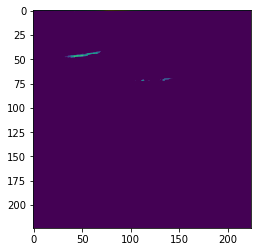

In [46]:
plt.imshow(image_T[0])

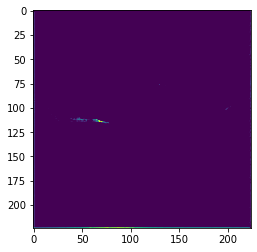

In [48]:
plt.imshow(image_T[1])

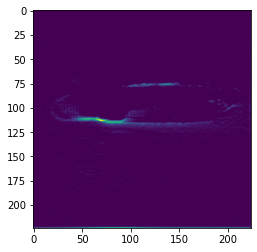

In [49]:
plt.imshow(image_T[2])

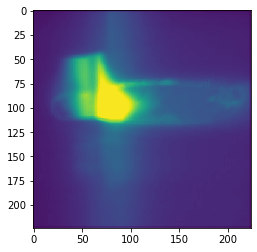

In [50]:
plt.imshow(image_T[3])

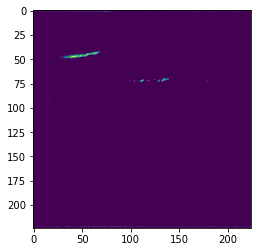

In [51]:
plt.imshow(image_T[4])

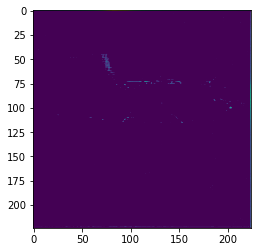

In [52]:
plt.imshow(image_T[5])

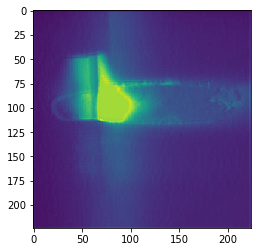

In [54]:
plt.imshow(image_T[7])

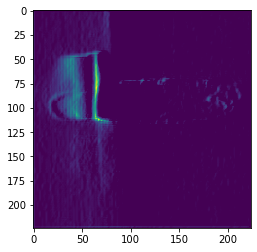

In [55]:
plt.imshow(image_T[8])

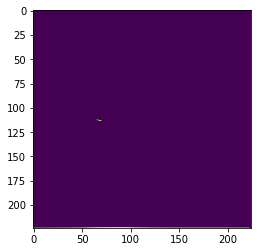

In [56]:
plt.imshow(image_T[9])

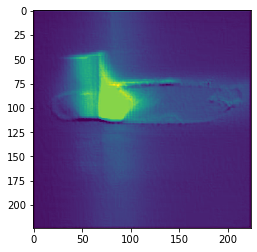

In [57]:
plt.imshow(image_T[10])

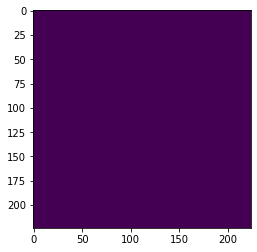

In [58]:
plt.imshow(image_T[11])

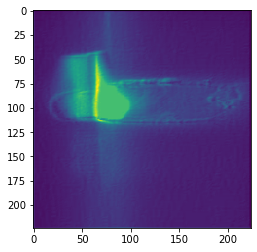

In [59]:
plt.imshow(image_T[12])

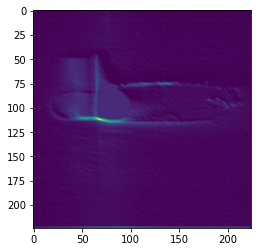

In [60]:
plt.imshow(image_T[13])

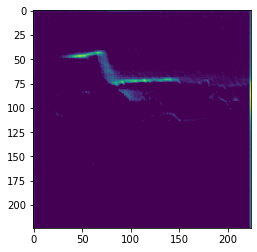

In [61]:
plt.imshow(image_T[14])

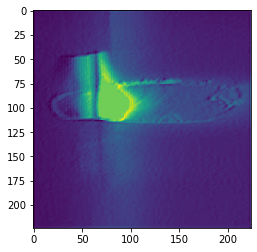

In [62]:
plt.imshow(image_T[15])

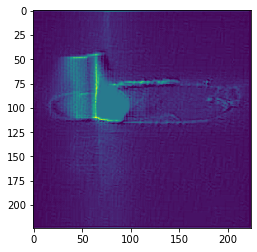

In [63]:
plt.imshow(image_T[16])

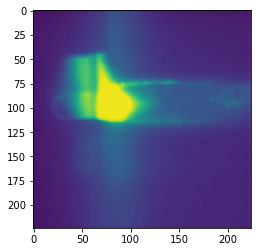

In [64]:
plt.imshow(image_T[17])

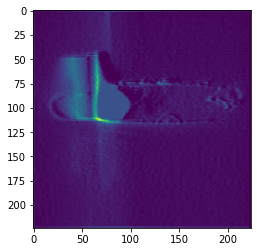

In [65]:
plt.imshow(image_T[18])

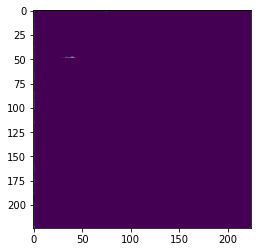

In [66]:
plt.imshow(image_T[19])

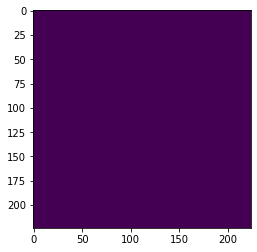

In [67]:
plt.imshow(image_T[20])

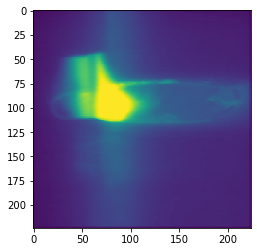

In [68]:
plt.imshow(image_T[21])

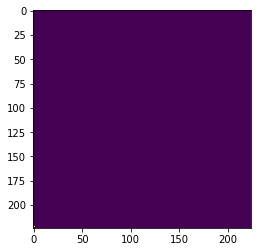

In [69]:
plt.imshow(image_T[22])

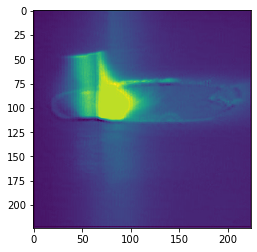

In [70]:
plt.imshow(image_T[23])

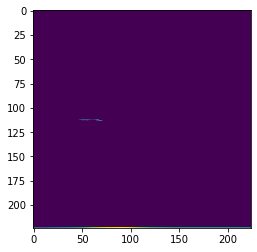

In [71]:
plt.imshow(image_T[24])

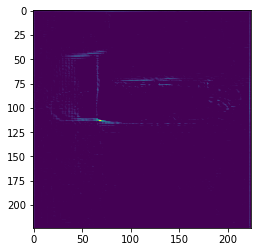

In [72]:
plt.imshow(image_T[25])

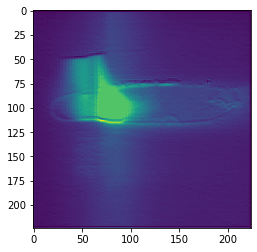

In [73]:
plt.imshow(image_T[26])

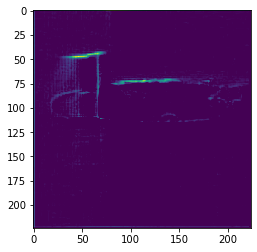

In [74]:
plt.imshow(image_T[27])

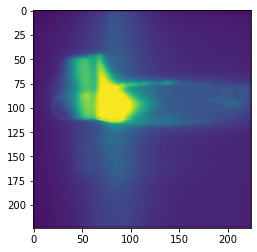

In [75]:
plt.imshow(image_T[28])

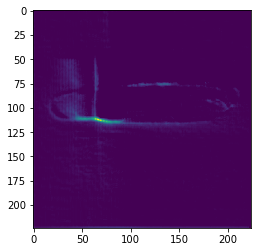

In [76]:
plt.imshow(image_T[29])

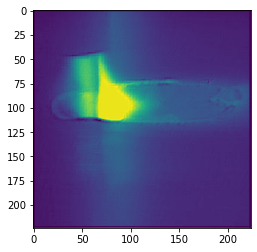

In [77]:
plt.imshow(image_T[30])

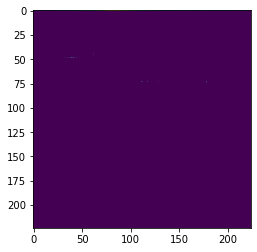

In [78]:
plt.imshow(image_T[31])

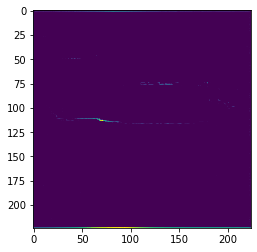

In [79]:
plt.imshow(image_T[32])

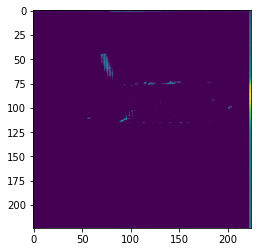

In [80]:
plt.imshow(image_T[33])

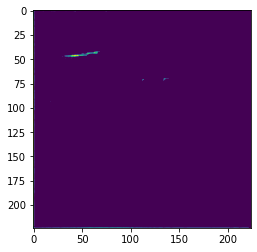

In [81]:
plt.imshow(image_T[34])

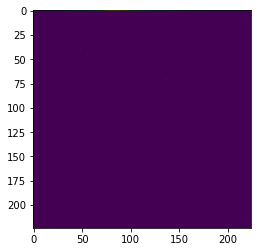

In [82]:
plt.imshow(image_T[35])

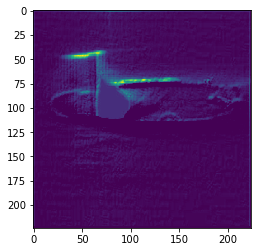

In [83]:
plt.imshow(image_T[36])

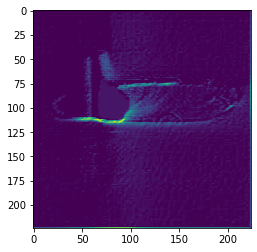

In [84]:
plt.imshow(image_T[37])

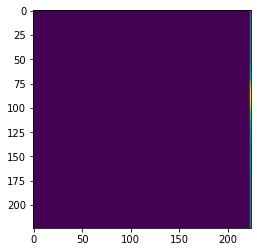

In [85]:
plt.imshow(image_T[38])

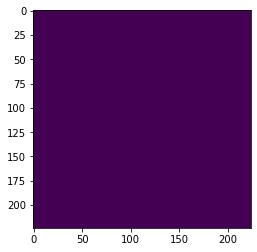

In [86]:
plt.imshow(image_T[39])

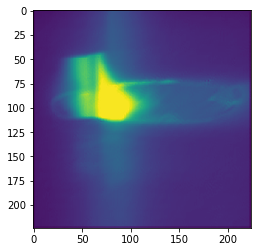

In [87]:
plt.imshow(image_T[40])

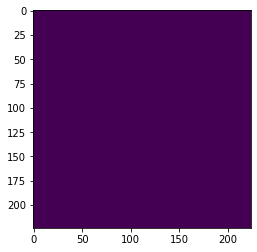

In [88]:
plt.imshow(image_T[41])

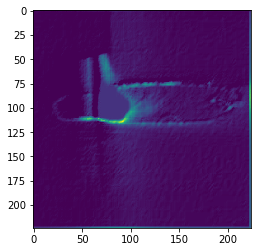

In [89]:
plt.imshow(image_T[42])

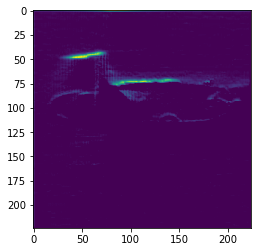

In [90]:
plt.imshow(image_T[43])

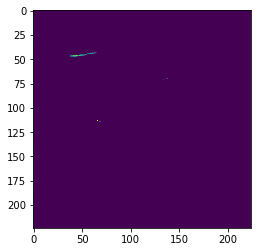

In [91]:
plt.imshow(image_T[44])

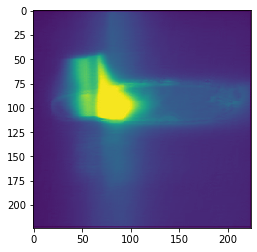

In [92]:
plt.imshow(image_T[45])

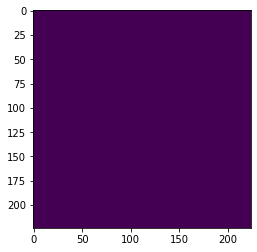

In [93]:
plt.imshow(image_T[46])

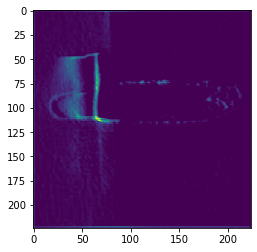

In [94]:
plt.imshow(image_T[47])

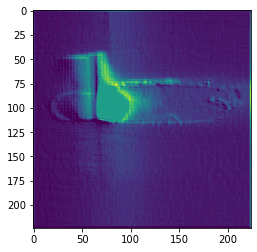

In [95]:
plt.imshow(image_T[48])

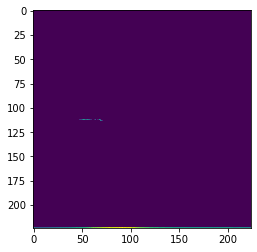

In [96]:
plt.imshow(image_T[49])

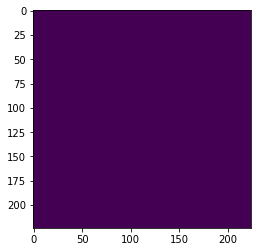

In [97]:
plt.imshow(image_T[50])

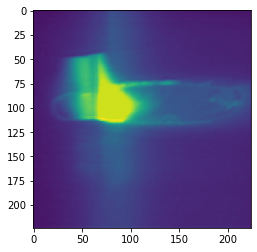

In [98]:
plt.imshow(image_T[51])

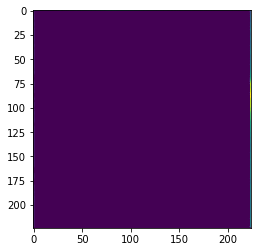

In [99]:
plt.imshow(image_T[52])

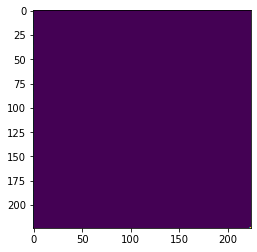

In [100]:
plt.imshow(image_T[53])

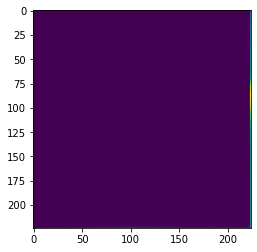

In [101]:
plt.imshow(image_T[54])

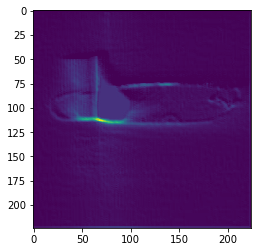

In [102]:
plt.imshow(image_T[55])

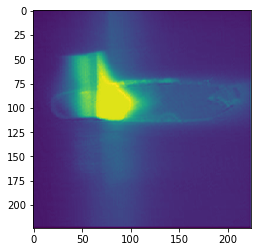

In [103]:
plt.imshow(image_T[56])

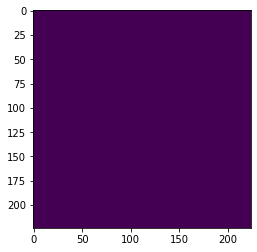

In [104]:
plt.imshow(image_T[57])

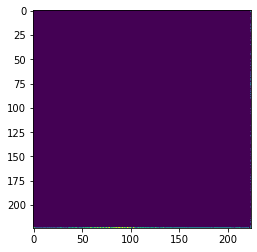

In [105]:
plt.imshow(image_T[58])

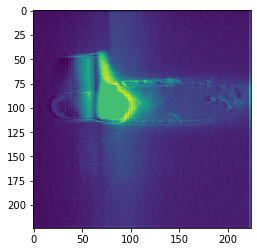

In [106]:
plt.imshow(image_T[59])

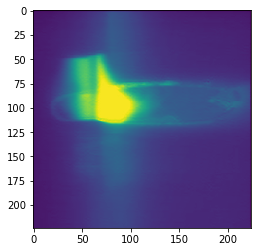

In [107]:
plt.imshow(image_T[60])

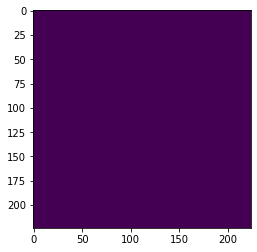

In [108]:
plt.imshow(image_T[61])

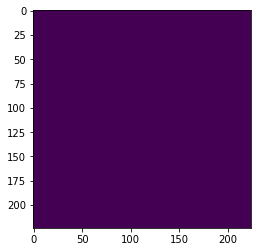

In [109]:
plt.imshow(image_T[62])

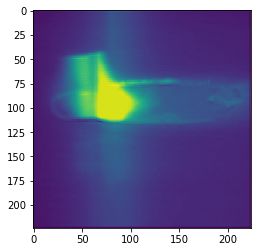

In [110]:
plt.imshow(image_T[63])

In [115]:
layer_name = 'block3_conv2'
image_block3_conv2 = conv_output(model, layer_name, image)

Tensor("input_4_2:0", shape=(?, 224, 224, 3), dtype=float32)
Tensor("block3_conv2_2/Relu:0", shape=(?, 56, 56, 256), dtype=float32)


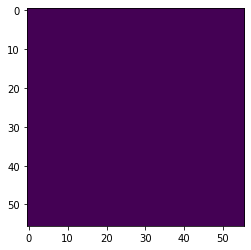

In [116]:
plt.imshow(image_block3_conv2.T[0])

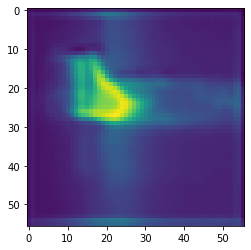

In [117]:
plt.imshow(image_block3_conv2.T[1])

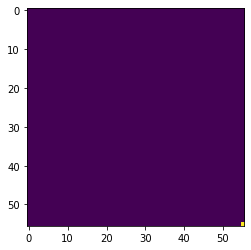

In [118]:
plt.imshow(image_block3_conv2.T[2])

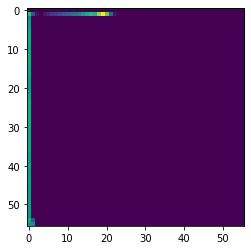

In [119]:
plt.imshow(image_block3_conv2.T[3])

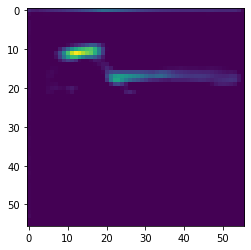

In [120]:
plt.imshow(image_block3_conv2.T[4])

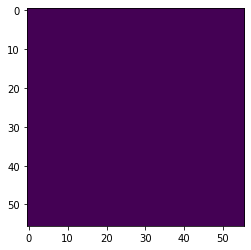

In [121]:
plt.imshow(image_block3_conv2.T[5])

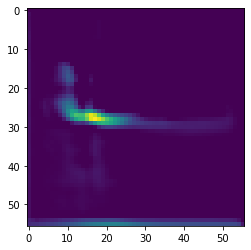

In [122]:
plt.imshow(image_block3_conv2.T[6])

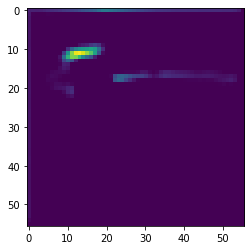

In [123]:
plt.imshow(image_block3_conv2.T[7])

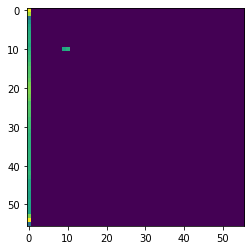

In [124]:
plt.imshow(image_block3_conv2.T[8])

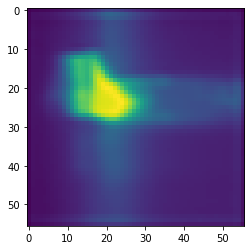

In [125]:
plt.imshow(image_block3_conv2.T[9])

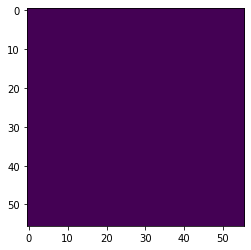

In [126]:
plt.imshow(image_block3_conv2.T[10])

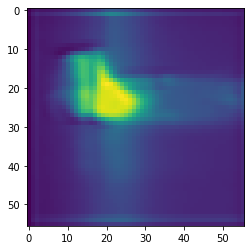

In [127]:
plt.imshow(image_block3_conv2.T[11])

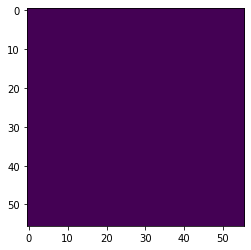

In [128]:
plt.imshow(image_block3_conv2.T[12])

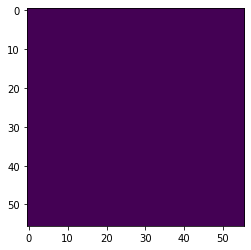

In [129]:
plt.imshow(image_block3_conv2.T[13])

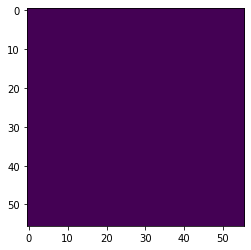

In [130]:
plt.imshow(image_block3_conv2.T[14])

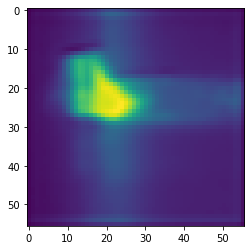

In [131]:
plt.imshow(image_block3_conv2.T[15])

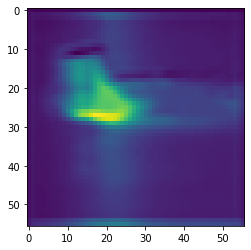

In [132]:
plt.imshow(image_block3_conv2.T[16])

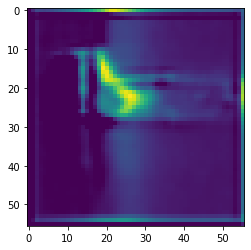

In [133]:
plt.imshow(image_block3_conv2.T[17])

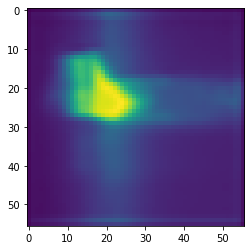

In [134]:
plt.imshow(image_block3_conv2.T[18])

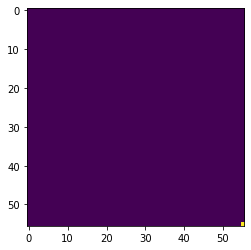

In [135]:
plt.imshow(image_block3_conv2.T[19])

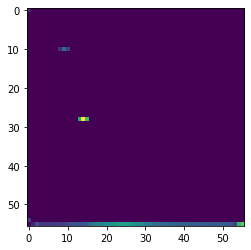

In [136]:
plt.imshow(image_block3_conv2.T[20])

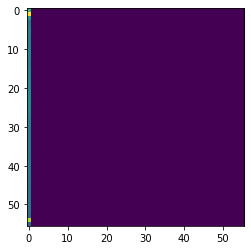

In [137]:
plt.imshow(image_block3_conv2.T[21])

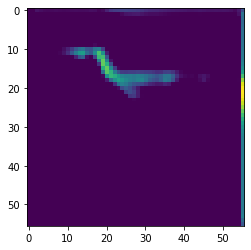

In [138]:
plt.imshow(image_block3_conv2.T[22])

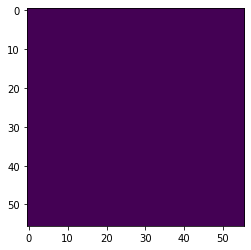

In [139]:
plt.imshow(image_block3_conv2.T[23])

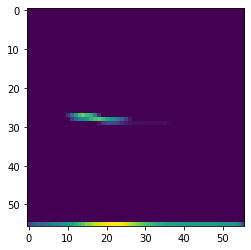

In [140]:
plt.imshow(image_block3_conv2.T[24])

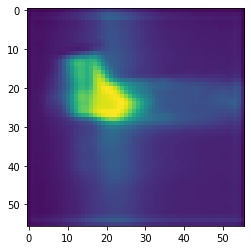

In [141]:
plt.imshow(image_block3_conv2.T[25])

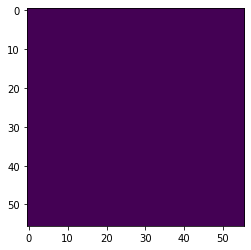

In [142]:
plt.imshow(image_block3_conv2.T[26])

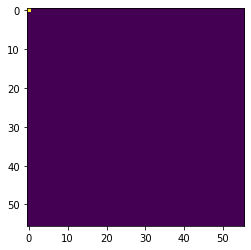

In [143]:
plt.imshow(image_block3_conv2.T[27])

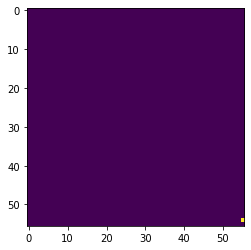

In [144]:
plt.imshow(image_block3_conv2.T[28])

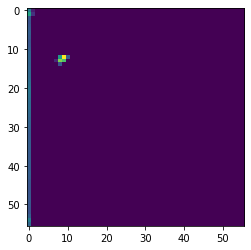

In [145]:
plt.imshow(image_block3_conv2.T[29])

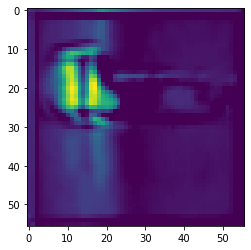

In [146]:
plt.imshow(image_block3_conv2.T[30])

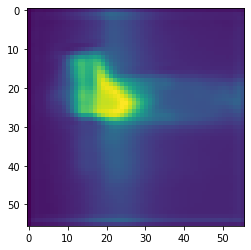

In [147]:
plt.imshow(image_block3_conv2.T[31])

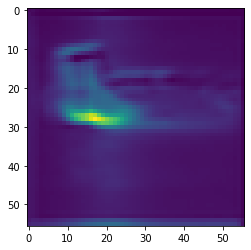

In [148]:
plt.imshow(image_block3_conv2.T[32])

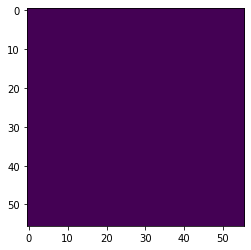

In [149]:
plt.imshow(image_block3_conv2.T[33])

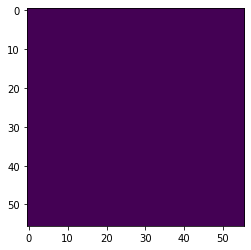

In [150]:
plt.imshow(image_block3_conv2.T[34])

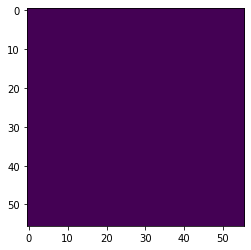

In [151]:
plt.imshow(image_block3_conv2.T[35])

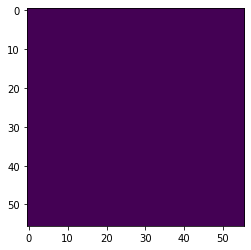

In [152]:
plt.imshow(image_block3_conv2.T[36])

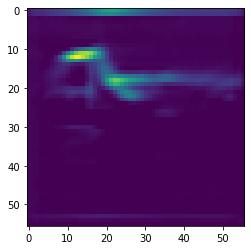

In [153]:
plt.imshow(image_block3_conv2.T[37])

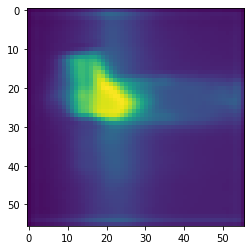

In [154]:
plt.imshow(image_block3_conv2.T[38])

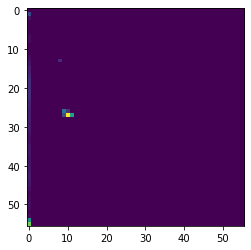

In [155]:
plt.imshow(image_block3_conv2.T[39])

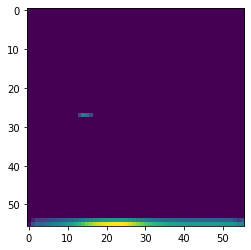

In [156]:
plt.imshow(image_block3_conv2.T[40])

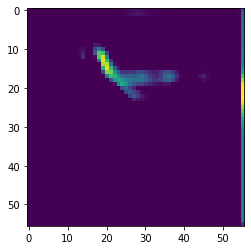

In [157]:
plt.imshow(image_block3_conv2.T[41])

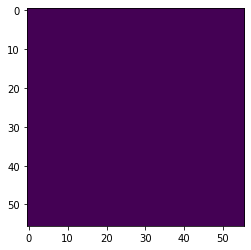

In [158]:
plt.imshow(image_block3_conv2.T[42])

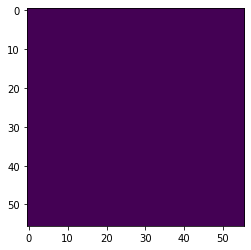

In [159]:
plt.imshow(image_block3_conv2.T[43])

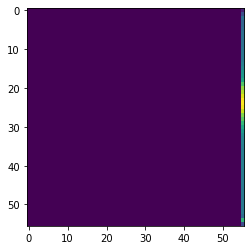

In [160]:
plt.imshow(image_block3_conv2.T[44])

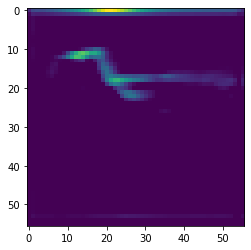

In [161]:
plt.imshow(image_block3_conv2.T[45])

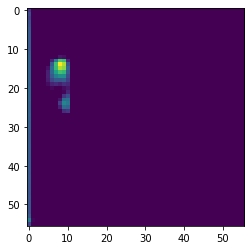

In [162]:
plt.imshow(image_block3_conv2.T[46])

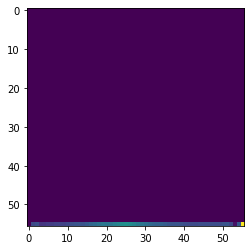

In [163]:
plt.imshow(image_block3_conv2.T[47])

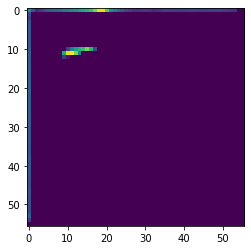

In [164]:
plt.imshow(image_block3_conv2.T[48])

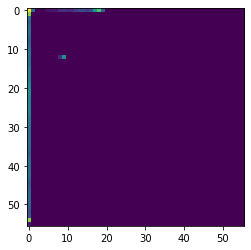

In [165]:
plt.imshow(image_block3_conv2.T[49])

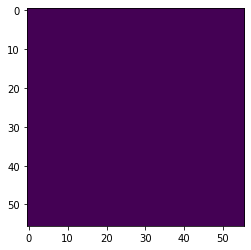

In [166]:
plt.imshow(image_block3_conv2.T[50])

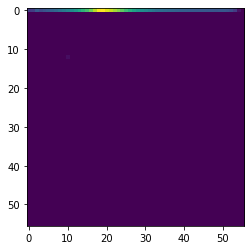

In [167]:
plt.imshow(image_block3_conv2.T[51])

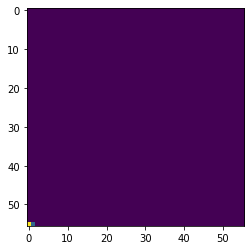

In [168]:
plt.imshow(image_block3_conv2.T[52])

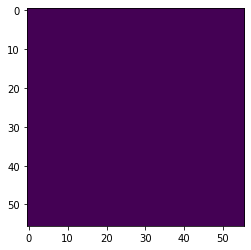

In [169]:
plt.imshow(image_block3_conv2.T[53])

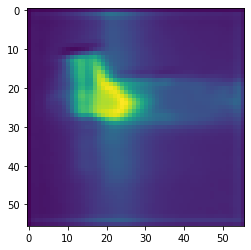

In [170]:
plt.imshow(image_block3_conv2.T[54])

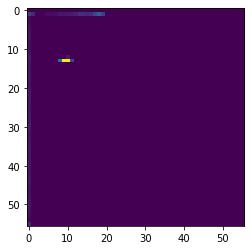

In [171]:
plt.imshow(image_block3_conv2.T[55])

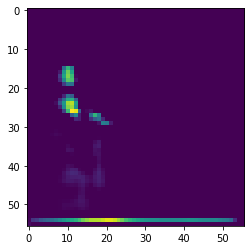

In [172]:
plt.imshow(image_block3_conv2.T[56])

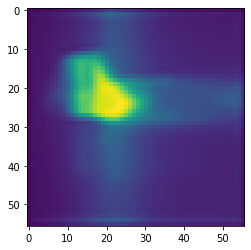

In [173]:
plt.imshow(image_block3_conv2.T[57])

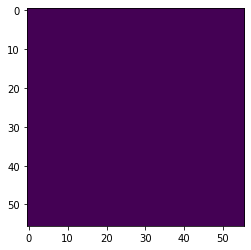

In [174]:
plt.imshow(image_block3_conv2.T[58])

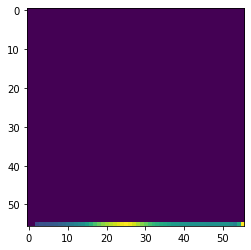

In [175]:
plt.imshow(image_block3_conv2.T[59])

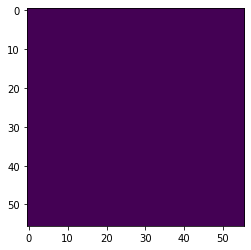

In [176]:
plt.imshow(image_block3_conv2.T[60])

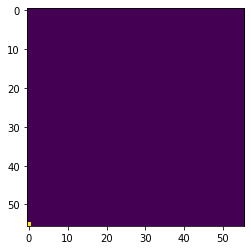

In [177]:
plt.imshow(image_block3_conv2.T[61])

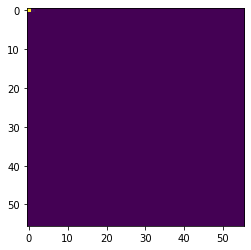

In [178]:
plt.imshow(image_block3_conv2.T[62])

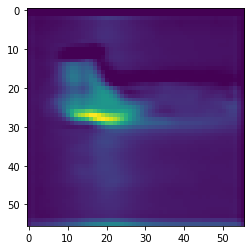

In [179]:
plt.imshow(image_block3_conv2.T[63])

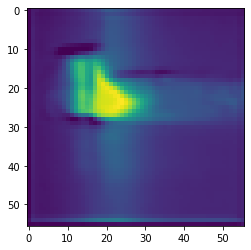

In [180]:
plt.imshow(image_block3_conv2.T[64])

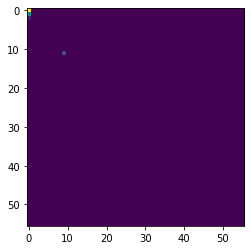

In [181]:
plt.imshow(image_block3_conv2.T[65])

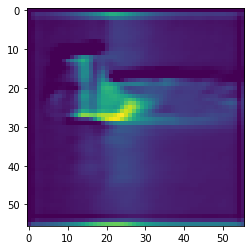

In [182]:
plt.imshow(image_block3_conv2.T[66])

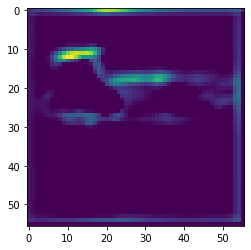

In [183]:
plt.imshow(image_block3_conv2.T[67])

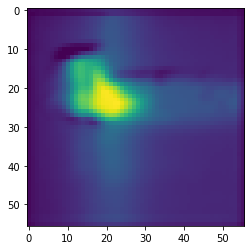

In [184]:
plt.imshow(image_block3_conv2.T[68])

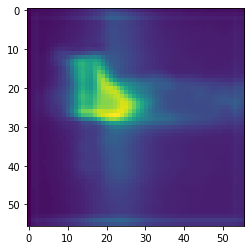

In [185]:
plt.imshow(image_block3_conv2.T[69])

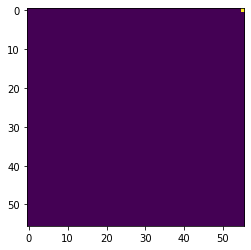

In [186]:
plt.imshow(image_block3_conv2.T[70])

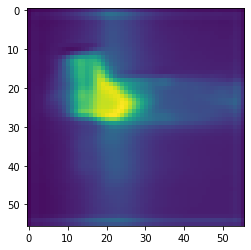

In [187]:
plt.imshow(image_block3_conv2.T[71])

In [188]:
layer_name = "block4_conv3"
image_block4_conv3  = conv_output(model, layer_name, image)

Tensor("input_4_2:0", shape=(?, 224, 224, 3), dtype=float32)
Tensor("block4_conv3_2/Relu:0", shape=(?, 28, 28, 512), dtype=float32)


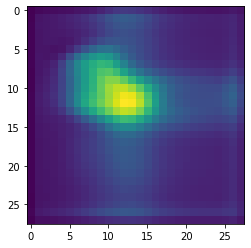

In [212]:
plt.imshow(image_block4_conv3.T[0])


IndexError: index 28 is out of bounds for axis 0 with size 28

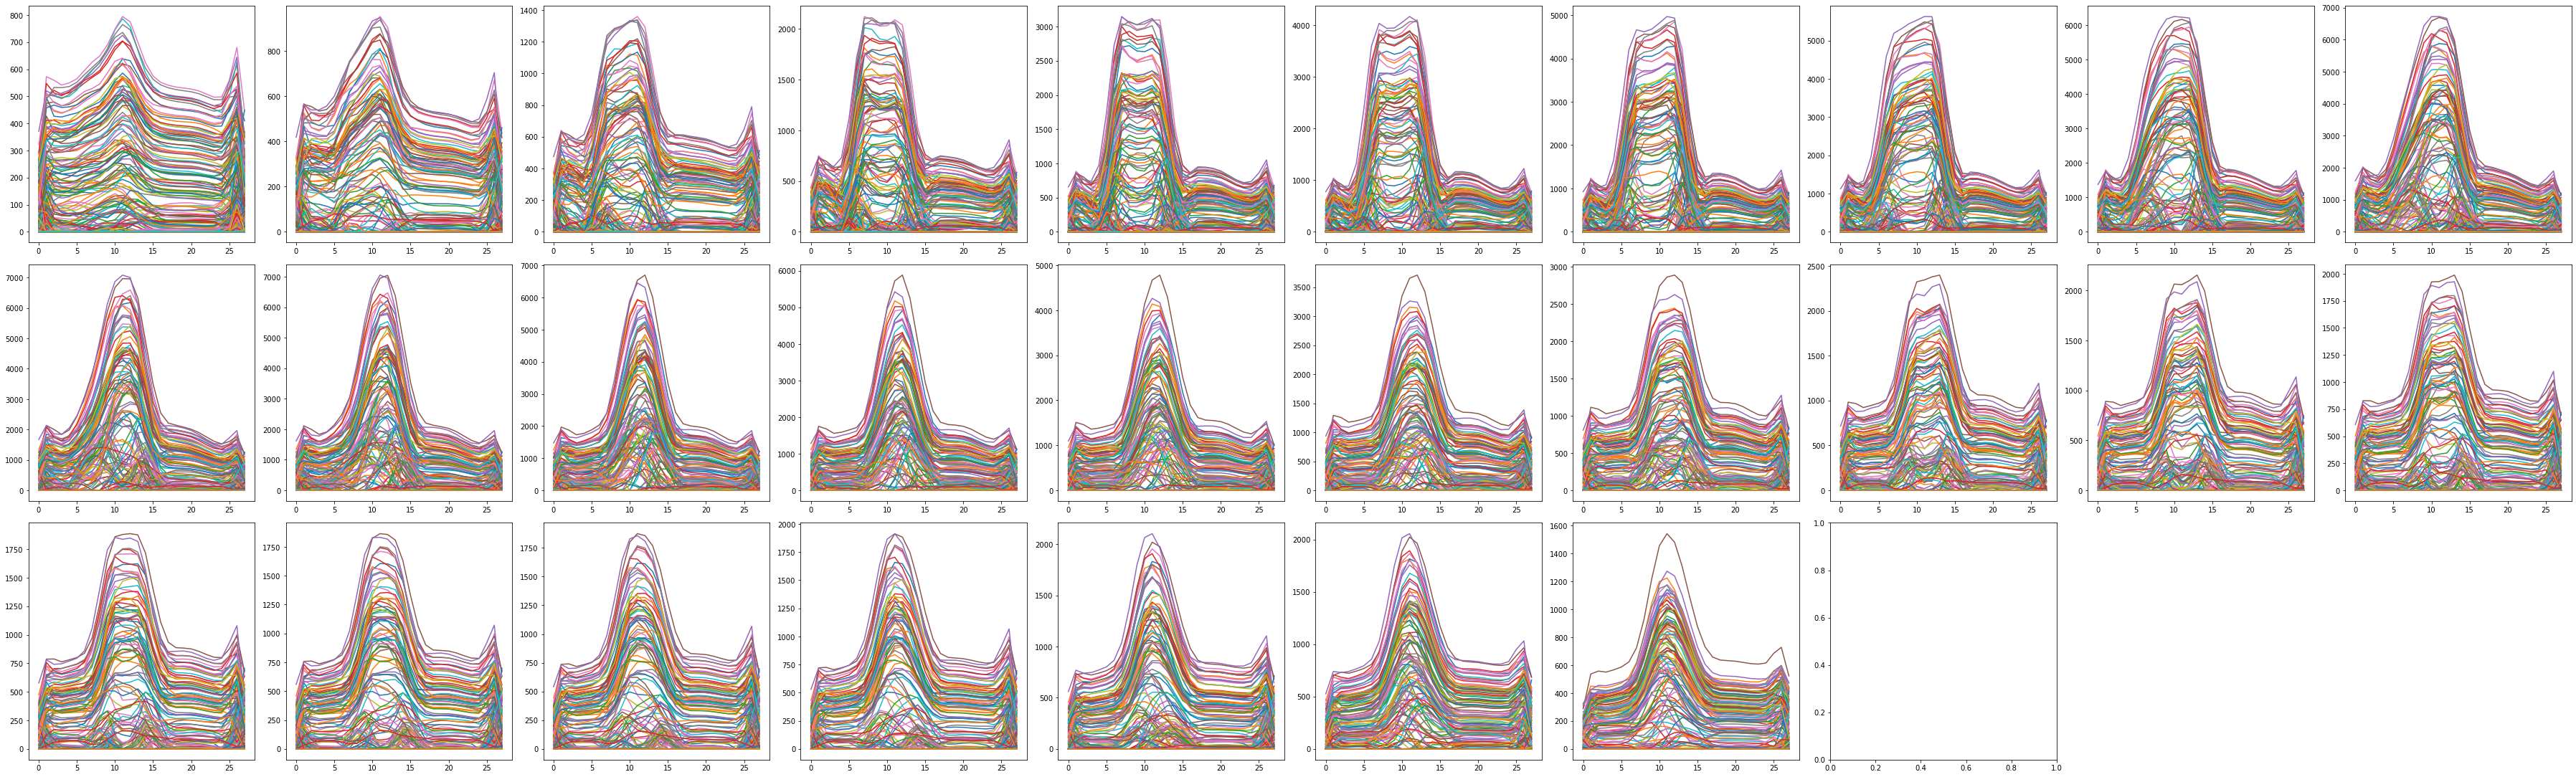

In [213]:
fig = plt.figure(figsize=(50,50))
for i in range(1,100):
    ax = fig.add_subplot(10,10,i)
#     ax.imshow(image_block4_conv3.T[i])
    plt.plot(image_block4_conv3[i])
    plt.tight_layout()
    
    

In [214]:
image_block4_conv3[0].shape

(28, 512)